## The effects of co-morbidities on Covid-19 Cases and Deaths

In [550]:
import pandas as pd
countytotalsdayof = pd.read_csv("covid-19-county-level-data.csv")
healthrankings= pd.read_csv("us-county-health-rankings-2020.csv")

Our study focus is on the counties around the United States. We have information on the daily number of cases and deaths per county as well as county health rankings information and statistics. 

# Data Cleaning and Preparation

In [202]:
countiesstats = countytotalsdayof.drop(columns = ['fips'])
countiesstats

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0
1,2020-01-22,Snohomish,Washington,1,0
2,2020-01-23,Snohomish,Washington,1,0
3,2020-01-24,Cook,Illinois,1,0
4,2020-01-24,Snohomish,Washington,1,0
...,...,...,...,...,...
185643,2020-05-28,Sweetwater,Wyoming,26,0
185644,2020-05-28,Teton,Wyoming,100,1
185645,2020-05-28,Uinta,Wyoming,12,0
185646,2020-05-28,Washakie,Wyoming,34,3


We are going to be utilizing all of the above variables for our analysis.
date : The date of the record.
county: The county of the record.
state: The state in which the county is in.
cases: Number of total cases.
deaths: Number of total deaths.

We will be calculating the daily change in cases and deaths (casenew, deathnew)

In [203]:
countiesstats = countiesstats.sort_values(['county','state','date'])
countiesstats['casenew'] = countiesstats.groupby(['county','state'])['cases'].diff().fillna(0) 
countiesstats

,date,county,state,cases,deaths,casenew
5000,2020-03-19,Abbeville,South Carolina,1,0,0.0
5873,2020-03-20,Abbeville,South Carolina,1,0,0.0
6877,2020-03-21,Abbeville,South Carolina,1,0,0.0
7997,2020-03-22,Abbeville,South Carolina,1,0,0.0
9208,2020-03-23,Abbeville,South Carolina,1,0,0.0
...,...,...,...,...,...,...
173083,2020-05-24,Ziebach,South Dakota,1,0,0.0
176048,2020-05-25,Ziebach,South Dakota,1,0,0.0
179013,2020-05-26,Ziebach,South Dakota,1,0,0.0
181985,2020-05-27,Ziebach,South Dakota,1,0,0.0


In [204]:
countiesstats['deathnew'] = countiesstats.groupby(['county','state'])['deaths'].diff().fillna(0) 
countiesstats

,date,county,state,cases,deaths,casenew,deathnew
5000,2020-03-19,Abbeville,South Carolina,1,0,0.0,0.0
5873,2020-03-20,Abbeville,South Carolina,1,0,0.0,0.0
6877,2020-03-21,Abbeville,South Carolina,1,0,0.0,0.0
7997,2020-03-22,Abbeville,South Carolina,1,0,0.0,0.0
9208,2020-03-23,Abbeville,South Carolina,1,0,0.0,0.0
...,...,...,...,...,...,...,...
173083,2020-05-24,Ziebach,South Dakota,1,0,0.0,0.0
176048,2020-05-25,Ziebach,South Dakota,1,0,0.0,0.0
179013,2020-05-26,Ziebach,South Dakota,1,0,0.0,0.0
181985,2020-05-27,Ziebach,South Dakota,1,0,0.0,0.0


In [124]:
CountyHealth = healthrankings[['county','state','percent_fair_or_poor_health' , 'percent_smokers' ,
                               'percent_adults_with_obesity' , 'percent_excessive_drinking' , 
                               'income_ratio', 'percent_adults_with_diabetes']]
CountyHealth.dropna() #drops the state data that has county as NaN

,county,state,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
1,Autauga,Alabama,20.882987,18.081557,33.3,15.026031,5.234597,11.1
2,Baldwin,Alabama,17.509134,17.489033,31.0,17.958310,4.417767,10.7
3,Barbour,Alabama,29.591802,21.999985,41.7,12.844016,5.681410,17.6
4,Bibb,Alabama,19.439724,19.114200,37.6,15.570042,4.368581,14.5
5,Blount,Alabama,21.745293,19.208672,33.8,14.230594,4.430262,17.0
...,...,...,...,...,...,...,...,...
3188,Sweetwater,Wyoming,14.813082,18.073422,29.8,22.871908,3.975923,8.8
3189,Teton,Wyoming,11.914358,14.546369,12.4,25.533577,3.775274,2.2
3190,Uinta,Wyoming,15.537464,17.212675,35.8,19.113357,4.350061,11.3
3191,Washakie,Wyoming,15.955971,16.859400,28.8,16.523261,3.327463,11.7


By joining our data we will compade the county health data to their overall number of cases and deaths. The health variables will function as the predictive variables for our future models. 
county: the county of the record.
state: the state in which the county is in.
percent_fair_or_poor_health : Percentage of the population that is considered in fair or poor health.
percent_smokers: Percentage of the population that smokes.
percent_adults_with_obesity: Percentage of the population that is obese.
percent_excessive_drinking: Percentage of the population that are excessive drinkers.  
income_ratio: The income ratio among the state population
percent_adults_with_diabetes: Percentage of the population that have diabetes.

In [189]:
currentstats = countiesstats[countiesstats.date == '2020-05-28']
currentstats

,date,county,state,cases,deaths,casenew,deathnew
184868,2020-05-28,Abbeville,South Carolina,37,0,2.0,0.0
183742,2020-05-28,Acadia,Louisiana,401,22,4.0,4.0
185332,2020-05-28,Accomack,Virginia,807,12,27.0,0.0
183210,2020-05-28,Ada,Idaho,803,22,3.0,0.0
183436,2020-05-28,Adair,Iowa,8,0,0.0,0.0
...,...,...,...,...,...,...,...
182770,2020-05-28,Yuma,Arizona,822,11,40.0,1.0
182962,2020-05-28,Yuma,Colorado,20,0,1.0,0.0
185288,2020-05-28,Zapata,Texas,8,0,0.0,0.0
185289,2020-05-28,Zavala,Texas,11,0,0.0,0.0


In [193]:
healthandtotals = pd.merge(currentstats[['county','state','cases','deaths']], CountyHealth, how = 'left', on= ['county','state'])
healthandtotals

,county,state,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
0,Abbeville,South Carolina,37,0,19.895036,17.323519,36.7,15.904724,5.219207,15.8
1,Acadia,Louisiana,401,22,20.890035,21.534088,38.4,19.778029,5.804627,11.4
2,Accomack,Virginia,807,12,20.089199,18.316929,36.3,15.480572,4.160476,15.9
3,Ada,Idaho,803,22,11.474882,11.990701,25.6,17.876234,4.478032,7.9
4,Adair,Iowa,8,0,13.854797,15.583571,31.5,19.872727,3.776499,12.0
...,...,...,...,...,...,...,...,...,...,...
2973,Yuma,Arizona,822,11,22.726376,13.327036,36.9,17.706147,4.361085,14.1
2974,Yuma,Colorado,20,0,15.268202,14.277809,27.8,17.208147,4.119748,9.3
2975,Zapata,Texas,8,0,35.610705,17.275488,31.2,14.865738,5.416121,4.7
2976,Zavala,Texas,11,0,40.990687,19.871284,24.2,13.780125,5.051775,4.1


162 Counties were excluded from the data as we had no records of cases or deaths from our data.

In [194]:
healthandtotals.dropna() #some counties did not have health data dropping another 87 counties

,county,state,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
0,Abbeville,South Carolina,37,0,19.895036,17.323519,36.7,15.904724,5.219207,15.8
1,Acadia,Louisiana,401,22,20.890035,21.534088,38.4,19.778029,5.804627,11.4
2,Accomack,Virginia,807,12,20.089199,18.316929,36.3,15.480572,4.160476,15.9
3,Ada,Idaho,803,22,11.474882,11.990701,25.6,17.876234,4.478032,7.9
4,Adair,Iowa,8,0,13.854797,15.583571,31.5,19.872727,3.776499,12.0
...,...,...,...,...,...,...,...,...,...,...
2973,Yuma,Arizona,822,11,22.726376,13.327036,36.9,17.706147,4.361085,14.1
2974,Yuma,Colorado,20,0,15.268202,14.277809,27.8,17.208147,4.119748,9.3
2975,Zapata,Texas,8,0,35.610705,17.275488,31.2,14.865738,5.416121,4.7
2976,Zavala,Texas,11,0,40.990687,19.871284,24.2,13.780125,5.051775,4.1


# Histograms

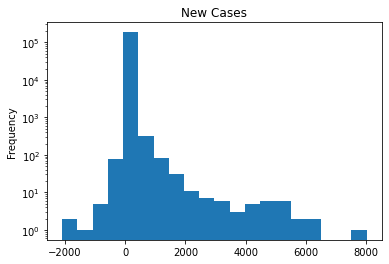

In [227]:
countiesstats.casenew.plot.hist(bins = 20, logy = True, title = 'New Cases', width = 1)

When exploring the new cases histogram we see that there are vales below zero. Exploring the data set we can find that some total county values of cases are adjusted and reported at a lower value thus we are going to be excluding the negative values. Because there is no way to decreas the number of confirmed cases.

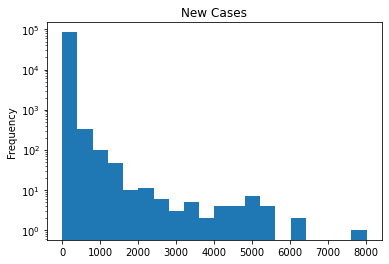

In [228]:
countiesstatsv1 = countiesstats.loc[countiesstats['casenew']>0]
countiesstatsv1.casenew.plot.hist(bins = 20,logy = True, title = 'New Cases', width = 1)

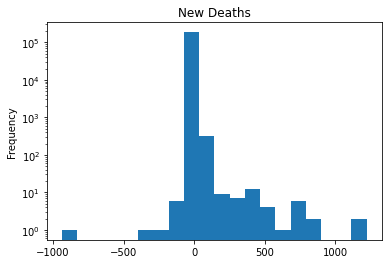

In [229]:
countiesstats.deathnew.plot.hist(bins = 20,logy = True, title = 'New Deaths', width = 1)

Similarly due to the above situation discussed there are negative values in our data set. But the excluded rows of data from the condition above fixes the graph already.

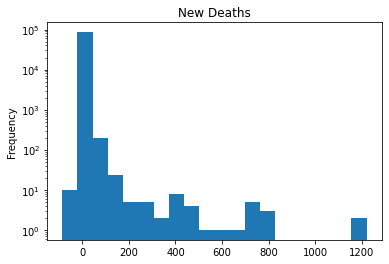

In [230]:
countiesstatsv1.deathnew.plot.hist(bins = 20,logy = True, title = 'New Deaths', width = 1)

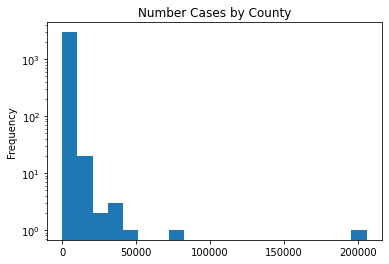

In [231]:
healthandtotals.cases.plot.hist(bins = 20, title = 'Number Cases by County', logy = True, width = 1)

The major outlier at 200000 is New York County, one of the most affected areas in the country. The data is consistent with what is reported in other sources.

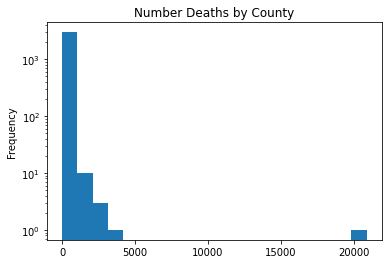

In [232]:
healthandtotals.deaths.plot.hist(bins = 20, title = 'Number Deaths by County', logy = True, width = 1)

The same outlier exists in the deaths by county graph, once again New York County will not be removed from the data set as it is the true value. 

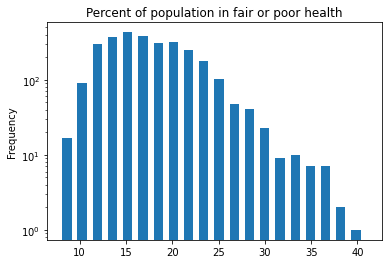

In [366]:
healthandtotals.percent_fair_or_poor_health.plot.hist(bins = 20, 
                title = 'Percent of population in fair or poor health', logy = True, width = 1)

The distribution of the graph somewhat resembles the sahpe of a normal distribution, no clear outliers exist.

# Descriptive statistics

In [290]:
healthandtotalsstats = pd.DataFrame()
healthandtotalsstats['mean'] = healthandtotals.mean()
healthandtotalsstats['median'] = healthandtotals.median()
healthandtotalsstats['var'] = healthandtotals.var()
healthandtotalsstats['std'] = healthandtotals.std()
healthandtotalsstats

,mean,median,var,std
cases,581.075890,43.000000,2.089346e+07,4570.936959
deaths,34.123909,1.000000,1.686084e+05,410.619516
percent_fair_or_poor_health,18.034635,17.343802,2.234296e+01,4.726834
percent_smokers,17.532791,17.087545,1.255117e+01,3.542763
percent_adults_with_obesity,33.026591,33.300000,2.948427e+01,5.429942
percent_excessive_drinking,17.483325,17.559710,1.008055e+01,3.174989
income_ratio,4.520333,4.411360,5.491752e-01,0.741064
percent_adults_with_diabetes,12.237759,11.700000,1.635616e+01,4.044275


In [301]:
countiesnewstats = pd.DataFrame()
countiesnewstats['mean'] = countiesstatsv1[['casenew','deathnew']].mean()
countiesnewstats['median'] = countiesstatsv1[['casenew','deathnew']].median()
countiesnewstats['var'] = countiesstatsv1[['casenew','deathnew']].var()
countiesnewstats['std'] = countiesstatsv1[['casenew','deathnew']].std()
countiesnewstats

,mean,median,var,std
casenew,20.504134,3.0,14241.769449,119.338885
deathnew,1.165234,0.0,158.266400,12.580397


# PMF

In [306]:
import thinkstats2
import thinkplot

In [350]:
pmfcases = thinkstats2.Pmf(countiesstatsv1['casenew'], label = 'Cases')
pmfdeaths = thinkstats2.Pmf(countiesstatsv1['deathnew'], label = 'Deaths')
pmfcases.Normalize()
pmfcases.Normalize()

0.9999999999999992

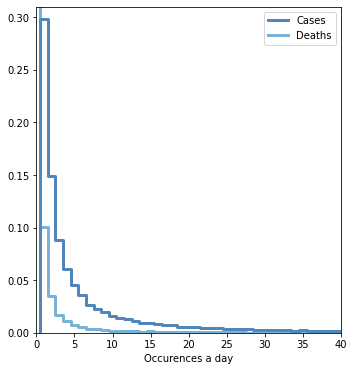

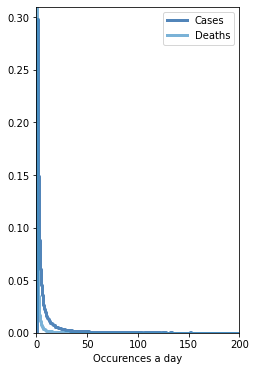

<Figure size 576x432 with 0 Axes>

In [352]:
thinkplot.PrePlot(2,cols = 2)
thinkplot.Pmfs([pmfcases,pmfdeaths])
thinkplot.Show(xlabel = 'Occurences a day',axis = [0,40,0,0.31])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmfcases,pmfdeaths])
thinkplot.Show(xlabel = 'Occurences a day',axis = [0,200,0,0.31])

Initially was working with a filter to compare the data between the State of New York and the rest of the USA. Yet I realized that sinze Deaths are dependent on Cases, you can think of it as a subset with an unfortunate categorical variable. The data continues outside the scope of the graph but to be able to see the nuances I decided to cut off the tail end. The Light blue graph represents the probability of the number of people to die on a certain day due to coronavirus. The darker blue represents the probability of the number of cases that will happen on a certain day.

# Cumulative Distribution Function

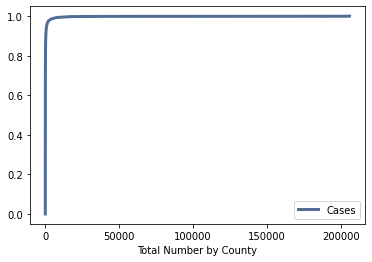

<Figure size 576x432 with 0 Axes>

In [368]:
cdf = thinkstats2.Cdf(countiesstats.cases, label = 'Cases')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Total Number by County', y = 'CDF')

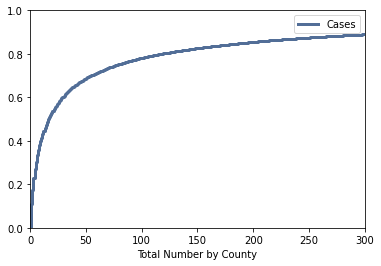

<Figure size 576x432 with 0 Axes>

In [367]:
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Total Number by County', y = 'CDF',axis = [0,300,0,1])


We can tell by the slope of the CDF that majority of the Counties (.7) are represented within 0-50 of cases. We also return to the outlier of New York at 200000. But once again to notice the proper curve of the data we have to cut off a certain amount of data. In the above graph we include about 90% of all cases, which tells us that 90% of all cases are in counties that have <300 cases in total.

# Analytical Distribution

The CDF of the total number of cases resembles a Pareto Distribution. A key characteristic of a Pareto Dist. is that taking the log of each axis will produce a straight line. 

/Users/annagoins/PycharmProjects/530 Final Project/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


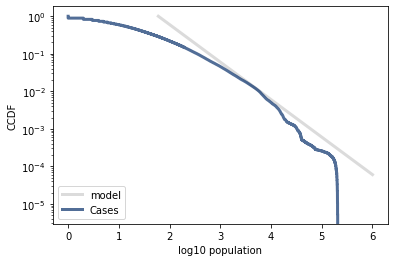

In [492]:
import numpy as np
log_cases = np.log10(countiesstats.cases)
cdf_log = thinkstats2.Cdf(log_cases, label = 'Cases')
#thinkplot.Cdf(cdf_log)
#thinkplot.Show(xlabel = 'Total Number by County', y = 'CDF',xscale = 'log')

xs, ys = thinkstats2.RenderParetoCdf(xmin=60, alpha=1, low=0, high=1e6)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

Turns out the data shouldn't be modeled by a Pareto Distribution, atleast not the entire model. The middle section of the graph fits well to the data.

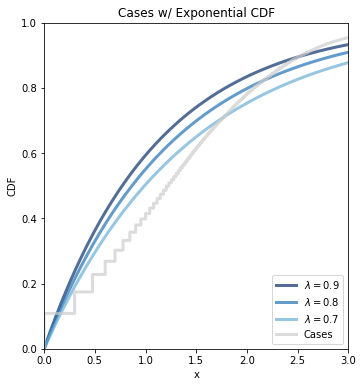

In [480]:
thinkplot.PrePlot(3, cols = 2)
for lam in [.9,.8,0.7]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50)
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
thinkplot.Cdf(cdf_log, color='0.8', yscale = 'log') 
thinkplot.Config(title='Cases w/ Exponential CDF', xlabel='x', ylabel='CDF', 
                 loc='lower right',axis = [0,3,0,1])

The Exponential Function is not a good estimate of the log-log CDF of Total Cases by County. 

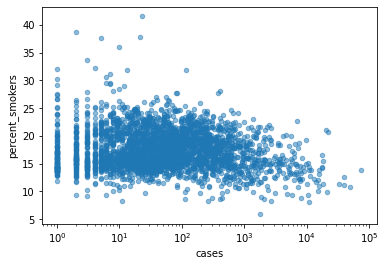

In [498]:
healthandtotals.plot(x= 'cases', y = 'percent_smokers', kind = 'scatter', logx = True, alpha = .5)

Plotting the data on the log of the x axis (cases) allows us to see the relationship in a more obvious way. To see a positive relationship between smokers in the population and number of cases we would be expecting the data to rise towards the top right corner. 

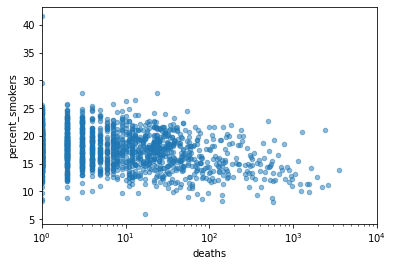

In [502]:
healthandtotals.plot(x= 'deaths', y = 'percent_smokers', kind = 'scatter', logx = True, alpha = .5, xlim = (1,1e4))

Plotting the deaths within the population I suspected would have a more substantial relationship but that can't be necessararily confirmed by the scatterplot. 

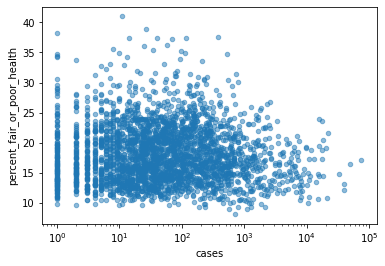

In [503]:
healthandtotals.plot(x= 'cases', y = 'percent_fair_or_poor_health', kind = 'scatter', logx = True, alpha = .5)

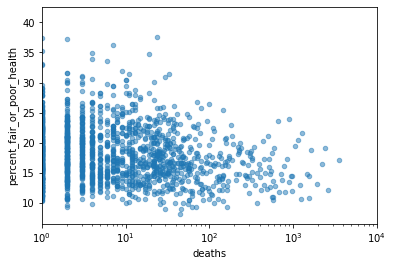

In [504]:
healthandtotals.plot(x= 'deaths', y = 'percent_fair_or_poor_health', kind = 'scatter', logx = True, alpha = .5, xlim = (1,1e4))

Similarly nothing specific shows up when comparing to the data of the counties percent fair or poor health population. 

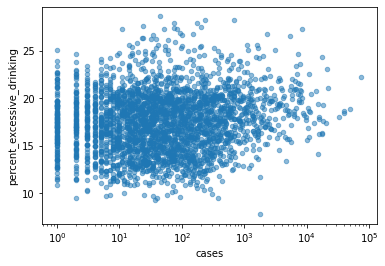

In [505]:
healthandtotals.plot(x= 'cases', y = 'percent_excessive_drinking', kind = 'scatter', logx = True, alpha = .5)

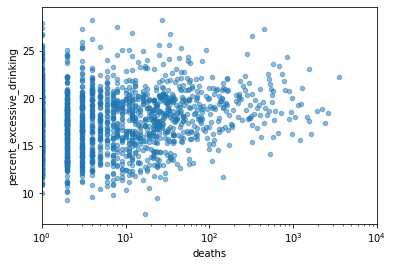

In [506]:
healthandtotals.plot(x= 'deaths', y = 'percent_excessive_drinking', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (1,1e4))

When it comes to the percentage of excessive drinking among the population the plot seems to trend upwards. Suggesting a possible positive correlation between the variables. 

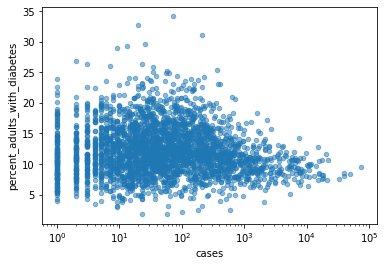

In [507]:
healthandtotals.plot(x= 'cases', y = 'percent_adults_with_diabetes', kind = 'scatter', logx = True, alpha = .5)

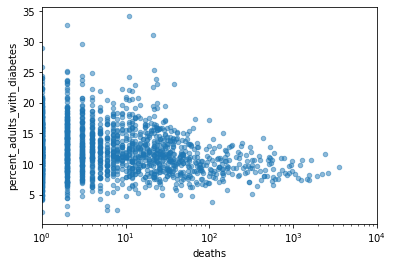

In [508]:
healthandtotals.plot(x= 'deaths', y = 'percent_adults_with_diabetes', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (1,1e4))

In [511]:
healthandtotals.corr()

,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
cases,1.000000,0.961989,-0.067480,-0.153402,-0.174721,0.092551,0.105900,-0.115397
deaths,0.961989,1.000000,-0.075720,-0.143611,-0.171740,0.090817,0.117204,-0.107484
percent_fair_or_poor_health,-0.067480,-0.075720,1.000000,0.733166,0.437596,-0.663194,0.548911,0.485468
percent_smokers,-0.153402,-0.143611,0.733166,1.000000,0.508141,-0.456785,0.400853,0.489241
percent_adults_with_obesity,-0.174721,-0.171740,0.437596,0.508141,1.000000,-0.322607,0.173003,0.518001
percent_excessive_drinking,0.092551,0.090817,-0.663194,-0.456785,-0.322607,1.000000,-0.317226,-0.474611
income_ratio,0.105900,0.117204,0.548911,0.400853,0.173003,-0.317226,1.000000,0.256205
percent_adults_with_diabetes,-0.115397,-0.107484,0.485468,0.489241,0.518001,-0.474611,0.256205,1.000000


As seen per the graphs of cases and deaths versus multiple health indicators dependant upon the county we are only finding a few weak correlations among the variables. Most notable the relationship between smokers,obesity and both cases and deaths. 

A strong linear relationship can be seen inbetween cases and deaths. Deaths being the dependent variable based on the fact that you would not be able to die of Covid-19 prior to contracting the virus.

Something that we are going to explore, is the relationship after cleaning up the data. Since some counties have luckily had no meaningful developments when it comes to cases or deaths,they end up being noise for the calculations since at the current time we are unable to clarify whether the counties have low numbers due to their health data or just because they have not yet been affected. We will exclude and see how the relationship among the variables are affected. 

In [513]:
hatfilter = healthandtotals[healthandtotals.deaths > 5]

In [514]:
hatfilter.corr()

,cases,deaths,percent_fair_or_poor_health,percent_smokers,percent_adults_with_obesity,percent_excessive_drinking,income_ratio,percent_adults_with_diabetes
cases,1.000000,0.962790,-0.110231,-0.260420,-0.275905,0.132584,0.150393,-0.196161
deaths,0.962790,1.000000,-0.127434,-0.240905,-0.270842,0.131229,0.170120,-0.182626
percent_fair_or_poor_health,-0.110231,-0.127434,1.000000,0.733144,0.593747,-0.661982,0.513058,0.586522
percent_smokers,-0.260420,-0.240905,0.733144,1.000000,0.664555,-0.443172,0.337297,0.600481
percent_adults_with_obesity,-0.275905,-0.270842,0.593747,0.664555,1.000000,-0.464446,0.145436,0.683393
percent_excessive_drinking,0.132584,0.131229,-0.661982,-0.443172,-0.464446,1.000000,-0.235002,-0.561714
income_ratio,0.150393,0.170120,0.513058,0.337297,0.145436,-0.235002,1.000000,0.200631
percent_adults_with_diabetes,-0.196161,-0.182626,0.586522,0.600481,0.683393,-0.561714,0.200631,1.000000


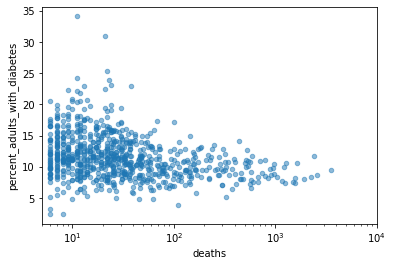

In [516]:
hatfilter.plot(x= 'deaths', y = 'percent_adults_with_diabetes', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (5,1e4))

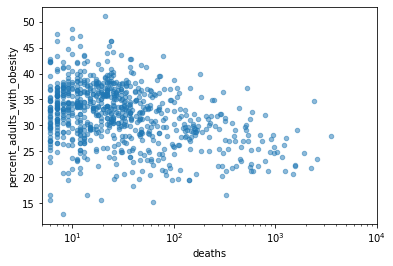

In [517]:
hatfilter.plot(x= 'deaths', y = 'percent_adults_with_obesity', kind = 'scatter',
                     logx = True, alpha = .5, xlim = (5,1e4))

As expected the correlation among variables has increased. Notable standounts are Obesity, Diabetes and Smoking. Yet all of the relationship are negative indicating that in fact a lower percentage of the population with these afflictions results in a higher number of cases and deaths. 

# Hypothesis Testing

As we are exploring the effects of comorbidities upon cases and deaths rates, we need to make sure that the relationships presented by the correlations are statistically sound. So we are going to be testing them to make sure of our hypothesis is confirmed. 

Given the sample and the negative correlation observed in the relationhip among deaths and percent adults with obesity what is the probability that this effect has occured by chance?

In [518]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [519]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [520]:
data = hatfilter.deaths, hatfilter.percent_adults_with_obesity
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The relationship we observe among the data is not by chance. 

# Regression Analysis

In [528]:
import statsmodels.api as sm
hatfilter = hatfilter.dropna()

In [543]:
y = hatfilter.deaths
X = hatfilter.percent_adults_with_obesity
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.081
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              69.22
Date:                Sat, 30 May 2020   Prob (F-statistic):                    3.89e-16
Time:                        20:35:57   Log-Likelihood:                         -5553.7
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     785   BIC:                                  1.111e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
percent_adults_with_obesity     2.5794      0.310      8.320      0.000       1.971       3.188
==============================================================================
Omnibus:                      966.975   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91329.898
Skew:                           6.295   Prob(JB):                         0.00
Kurtosis:                      54.286   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P-value<.05 indicates that for every 1 percent in the county population that is obese, you can expect 2.6 deaths.

In [547]:
y = hatfilter.deaths
X = hatfilter[['percent_adults_with_obesity', 'percent_smokers']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.079
Method:                 Least Squares   F-statistic:                              34.80
Date:                Sat, 30 May 2020   Prob (F-statistic):                    3.31e-15
Time:                        20:37:31   Log-Likelihood:                         -5553.5
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     784   BIC:                                  1.112e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
percent_adults_with_obesity     1.2392      2.056      0.603      0.547      -2.796       5.274
percent_smokers                 2.5691      3.895      0.660      0.510      -5.077      10.215
==============================================================================
Omnibus:                      967.787   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91746.810
Skew:                           6.303   Prob(JB):                         0.00
Kurtosis:                      54.406   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Due to the high p-values there is a likely chance that the observed relationships happened by chance.

In [548]:
y = hatfilter.deaths
X = hatfilter[['percent_adults_with_obesity', 'percent_adults_with_diabetes']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.083
Model:                            OLS   Adj. R-squared (uncentered):              0.080
Method:                 Least Squares   F-statistic:                              35.27
Date:                Sat, 30 May 2020   Prob (F-statistic):                    2.15e-15
Time:                        20:37:56   Log-Likelihood:                         -5553.1
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     784   BIC:                                  1.112e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
percent_adults_with_obesity      4.1786      1.435      2.911      0.004       1.361       6.996
percent_adults_with_diabetes    -4.4038      3.860     -1.141      0.254     -11.980       3.173
==============================================================================
Omnibus:                      967.428   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91513.372
Skew:                           6.300   Prob(JB):                         0.00
Kurtosis:                      54.338   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [549]:
y = hatfilter.deaths
X = hatfilter[['percent_adults_with_obesity', 'percent_fair_or_poor_health']]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 deaths   R-squared (uncentered):                   0.087
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              37.39
Date:                Sat, 30 May 2020   Prob (F-statistic):                    3.08e-16
Time:                        20:38:44   Log-Likelihood:                         -5551.1
No. Observations:                 786   AIC:                                  1.111e+04
Df Residuals:                     784   BIC:                                  1.112e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
percent_adults_with_obesity    -0.8618      1.540     -0.560      0.576      -3.885       2.161
percent_fair_or_poor_health     6.3026      2.763      2.281      0.023       0.879      11.726
==============================================================================
Omnibus:                      964.791   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91146.118
Skew:                           6.268   Prob(JB):                         0.00
Kurtosis:                      54.244   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Due to the the coeficients for the attempted models exceeding the appropriate p-value we conclude that the initial Simple Linear Regression Model is the best to predict upon the data. 